In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [3]:
BoomBikes = pd.read_csv("D:day (1).csv")

## Reading and understanding data

In [4]:
BoomBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
BoomBikes.shape

(730, 16)

In [6]:
BoomBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
BoomBikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
BoomBikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Visualising the Data


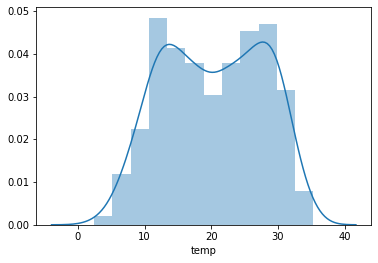

In [9]:
sns.distplot(BoomBikes["temp"])


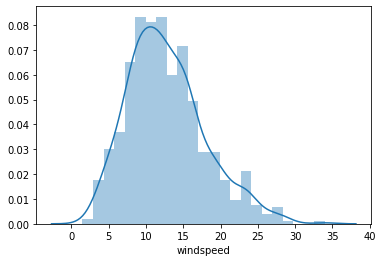

In [10]:
sns.distplot(BoomBikes["windspeed"])

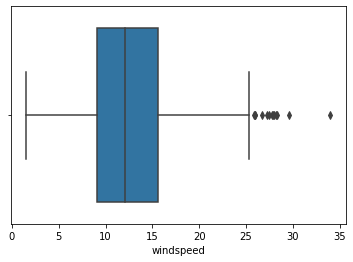

In [11]:
sns.boxplot(BoomBikes["windspeed"])
plt.show()

## Data Preparation

In [12]:
BoomBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
#Drop Columna
BoomBikes.drop(columns=['instant','dteday','atemp','casual','registered'],axis=1,inplace=True)
BoomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [14]:
#Assigning string values to different season instead of numeric values


In [15]:
# 1 spring
BoomBikes.loc[(BoomBikes["season"]==1),"season"]="spring"
# 2 spring
BoomBikes.loc[(BoomBikes["season"]==2),"season"]="summer"
# 3 spring
BoomBikes.loc[(BoomBikes["season"]==3),"season"]="fall"
# 4 spring
BoomBikes.loc[(BoomBikes["season"]==4),"season"]="fall"
BoomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [16]:
# To check conversion
BoomBikes["season"].astype("category").value_counts()

fall      366
summer    184
spring    180
Name: season, dtype: int64

In [17]:
pd.get_dummies(BoomBikes["weekday"])

,0,1,2,3,4,5,6
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
725,0,0,0,0,0,1,0
726,0,0,0,0,0,0,1
727,1,0,0,0,0,0,0
728,0,1,0,0,0,0,0


In [18]:

BoomBikes.loc[(BoomBikes["weekday"]==1),"weekday"]="sunday"

BoomBikes.loc[(BoomBikes["weekday"]==2),"weekday"]="monday"

BoomBikes.loc[(BoomBikes["weekday"]==3),"weekday"]="tuesday"

BoomBikes.loc[(BoomBikes["weekday"]==4),"weekday"]="wednesday"

BoomBikes.loc[(BoomBikes["weekday"]==5),"weekday"]="thursday"

BoomBikes.loc[(BoomBikes["weekday"]==6),"weekday"]="friday"

BoomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,sunday,1,2,14.110847,80.5833,10.749882,985
1,spring,0,1,0,monday,1,2,14.902598,69.6087,16.652113,801
2,spring,0,1,0,tuesday,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,wednesday,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,thursday,1,1,9.305237,43.6957,12.522300,1600


In [19]:
pd.get_dummies(BoomBikes["weathersit"])

,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,0,1,0
726,0,1,0
727,0,1,0
728,1,0,0


In [20]:
#Now, you don't need three columns. You can drop the cloudy column, as the cloudy can be identified with just the first two columns where —

#00 will correspond to cloudy
#01 will correspond to sunny
#10 will correspond to rainy


In [21]:
BoomBikes.loc[(BoomBikes["weathersit"]==1),"weathersit"]="sunny"

BoomBikes.loc[(BoomBikes["weathersit"]==2),"weathersit"]="rainy"

BoomBikes.loc[(BoomBikes["weathersit"]==3),"weathersit"]="cloudy"
BoomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,sunday,1,rainy,14.110847,80.5833,10.749882,985
1,spring,0,1,0,monday,1,rainy,14.902598,69.6087,16.652113,801
2,spring,0,1,0,tuesday,1,sunny,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,wednesday,1,sunny,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,thursday,1,sunny,9.305237,43.6957,12.522300,1600


In [22]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(BoomBikes["weathersit"], drop_first = True)

In [23]:
def object_map(x):
    return x.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
BoomBikes[["mnth"]]=BoomBikes[["mnth"]].apply(object_map)
BoomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,sunday,1,rainy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,monday,1,rainy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,tuesday,1,sunny,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,wednesday,1,sunny,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,thursday,1,sunny,9.305237,43.6957,12.522300,1600


In [24]:
BoomBikes_categorical=BoomBikes.select_dtypes(include=["object"])

In [25]:
#Convert into dummies
BoomBikes_dummies=pd.get_dummies(BoomBikes_categorical,drop_first=True)
BoomBikes_dummies.head()

,season_spring,season_summer,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_Jun,mnth_Mar,mnth_May,...,mnth_Oct,mnth_Sep,weekday_friday,weekday_monday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_rainy,weathersit_sunny
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [26]:
#Drop categorical variable column
BoomBikes=BoomBikes.drop(list(BoomBikes_categorical.columns),axis=1)

In [27]:
BoomBikes=pd.concat([BoomBikes,BoomBikes_dummies],axis=1)

In [28]:
BoomBikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_friday,weekday_monday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_rainy,weathersit_sunny
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [29]:
#Split dataframe into train and test sets
from sklearn.model_selection import train_test_split

In [30]:
# We specify this so the data aleays have same row
np.random.seed(0)
df_train, df_test = train_test_split(BoomBikes, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_friday,weekday_monday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_rainy,weathersit_sunny
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,0,...,1,0,0,0,0,0,1,0,0,1
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,1
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,6664,0,1,0,...,0,0,0,1,0,0,0,0,1,0
578,1,0,1,30.852500,65.9583,8.666718,7261,0,0,1,...,0,0,0,0,0,1,0,0,0,1
53,0,0,1,9.091299,42.3043,6.305571,1917,1,0,0,...,0,0,0,0,0,1,0,0,0,1
350,0,0,1,10.591653,56.0833,16.292189,2739,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [31]:
# Scaling the data set so all should be in same scale

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()


In [34]:
#Apply to all columns except dummies


In [35]:
BoomBikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_friday,weekday_monday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_rainy,weathersit_sunny
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [36]:
var=["temp","hum","windspeed","cnt"]
df_train[var]=scaler.fit_transform(df_train[var])


In [37]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_friday,weekday_monday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_rainy,weathersit_sunny
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,...,1,0,0,0,0,0,1,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_friday,weekday_monday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_rainy,weathersit_sunny
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.096078,...,0.086275,0.080392,0.129412,0.152941,0.154902,0.147059,0.135294,0.143137,0.343137,0.627451
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.294988,...,0.281045,0.272166,0.335985,0.360284,0.362166,0.354512,0.342373,0.350557,0.475223,0.483958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


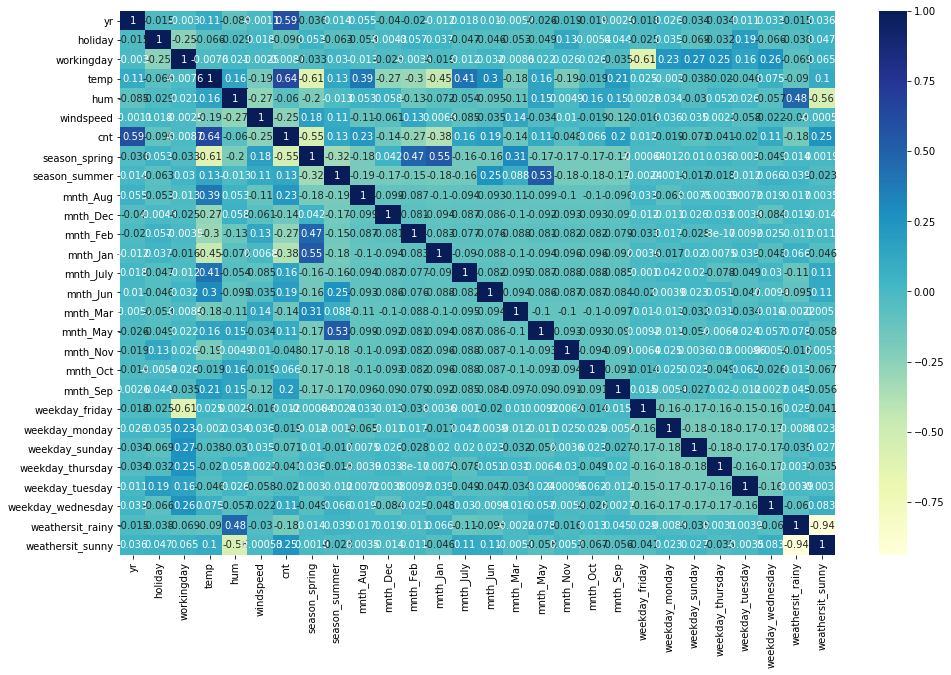

In [39]:
# To check the correlation coefficients
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [40]:
# More people are going for cycling during summer and spring.

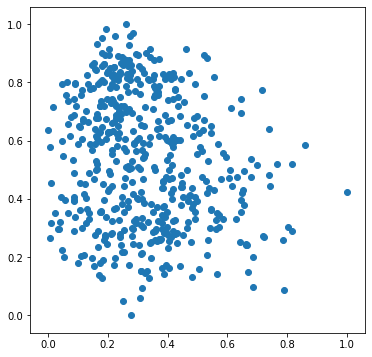

In [41]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.windspeed, df_train.temp)
plt.show()

In [42]:
# I used windspeed and temp for scatter plot

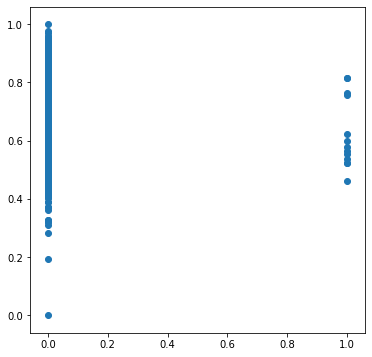

In [43]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.holiday, df_train.hum)
plt.show()

In [44]:
# Dividing data into x and y

In [45]:
y_train = df_train.pop('cnt')
X_train = df_train

In [46]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['windspeed']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [47]:
# Check the parameters obtained

lr.params

const        0.621300
windspeed   -0.335696
dtype: float64

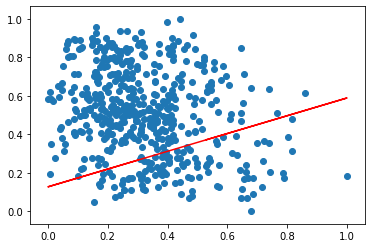

In [48]:
# visualising the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [49]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     34.97
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           6.14e-09
Time:                        18:35:00   Log-Likelihood:                 55.488
No. Observations:                 510   AIC:                            -107.0
Df Residuals:                     508   BIC:                            -98.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6213      0.021     30.164      0.0

In [50]:
# R square value obtained is 0.064, P value is o,const is 0.62

In [51]:
#Regression Model(RFE)

In [52]:
from sklearn.feature_selection import RFE
#RFE with 15 features
lm=LinearRegression()
rfel=RFE(lm,15)
#Fit with 15 features
rfel.fit(X_train,y_train)
#Print the Boolean results
print(rfel.support_)
print(rfel.ranking_)

[ True  True False  True  True  True  True False False False  True  True
  True False False  True  True  True  True False False False False False
 False  True  True]
[ 1  1  2  1  1  1  1 13  9 11  1  1  1 10  8  1  1  1  1 12  6  7  4  5
  3  1  1]


In [53]:
# Import statsmodels
import statsmodels.api as sm
#subset the feature selected by rfel
coll=X_train.columns[rfel.support_]
# substitute training data for selested columns
X_train_rfel=X_train[coll]
# Add a constant to the model
X_train_rfel=sm.add_constant(X_train_rfel)
X_train_rfel.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,mnth_Feb,mnth_Jan,mnth_July,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_rainy,weathersit_sunny
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,0,0,0,0,1,0,0,1
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0,1
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0,1
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,0,1,0


In [54]:
# Fitting the model with 15 variable
lml=sm.OLS(y_train,X_train_rfel).fit()
print(lml.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.7
Date:                Mon, 15 Mar 2021   Prob (F-statistic):          6.66e-187
Time:                        18:35:54   Log-Likelihood:                 509.23
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     494   BIC:                            -918.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1390      0.045  

In [55]:
#R squared value is 84.5% correct. So tested data is all right